In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1.
Apply simple linear regression with gradient descent method for x= {1, 2, 4, 3, 5} and y= {1, 3, 3, 2, 5} and plot Error (y axis) vs.  Iteration (x axis) for 4 epochs (20 iterations). Manually work out the values for the first epoch and verify the results in your notebook.

In [8]:
data="""
x,y
1,1
2,3
3,3
4,2
5,5
"""

with open('data.csv', 'w') as f:
    f.write(data.strip())

In [10]:
def sgd(df, learning_rate=0.00001, epochs=4):
    X = df['x']
    y = df['y']
    
    B0 = 0.0
    B1 = 0.0
    errorlist = []
    n = len(X)
    
    for epoch in range(epochs): 
        for i in range(n):
            xi = X[i]
            yi = y[i]
            
            # Make prediction
            pi = B0 + (B1 * xi)
            
            # Calculate error
            error = pi - yi
            errorlist.append(error)

            # Update coefficients
            B0 = B0 - 2 * learning_rate * error
            B1 = B1 - 2 * learning_rate * error * xi
            
#     print(f'Final B0: {B0}')
#     print(f'Final B1: {B1}')
    return B0, B1, errorlist

df = pd.read_csv('data.csv')
B0, B1, errorlist = sgd(df)
B0, B1

(0.0011177062112778249, 0.003911423560236436)

3. Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between  
salary and experience with exerience in x-axis and salary in y axis.  
a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the  
graph  
between beta and mean squared error(MSE) for each case.  
b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between  
beta and mean squared error(MSE).  
c. Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between  
beta and mean squared error(MSE).  
d. Use the scikit learn and compare the results of MSE.  

In [11]:
data="""
salary,experience
1.7,1.2
2.4,1.5
2.3,1.9
3.1,2.2
3.7,2.4
4.2,2.5
4.4,2.8
6.1,3.1
5.4,3.3
5.7,3.7
6.4,4.2
6.2,4.4
"""

with open('data.csv', 'w') as f:
    f.write(data.strip())

Slope: 1.5670982931135966
Intercept: -0.03563861094761833


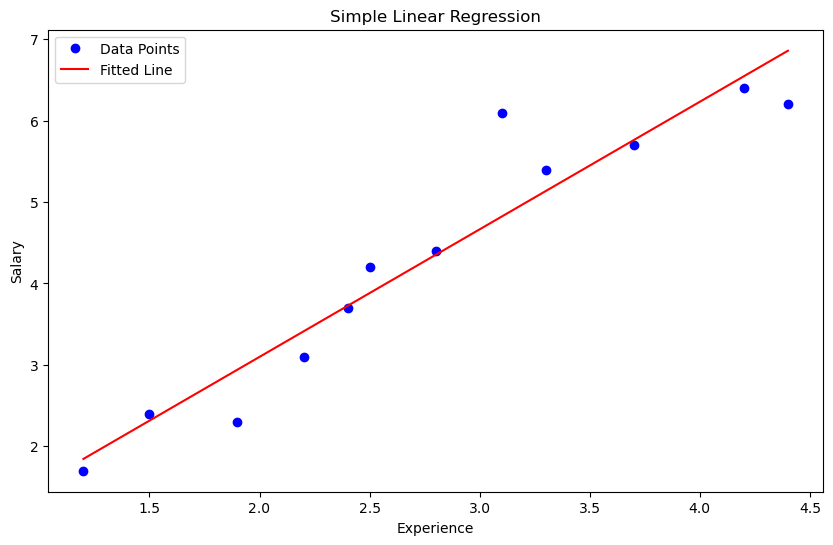

In [23]:
def slr(X, y):
    # Calculate the means of X and y
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    
    # Calculate the coefficients (slope and intercept)
    num = np.sum((X - X_mean) * (y - y_mean))
    denom = np.sum((X - X_mean) ** 2)
    B1 = num / denom
    B0 = y_mean - (B1 * X_mean)
    
    # Print the coefficients
    print(f"Slope: {B1}")
    print(f"Intercept: {B0}")
    
    # Make predictions
    y_pred = B0 + B1 * X
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, 'bo', label='Data Points')
    plt.plot(X, y_pred, 'r-', label='Fitted Line')
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.title('Simple Linear Regression')
    plt.legend()
    plt.show()
    
df = pd.read_csv('data.csv')
X, y = df['experience'].values, df['salary'].values
slr(X, y)